In [1]:
# ! pip install matplotlib
# ! pip install pandas
# ! pip install numpy
# ! pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0,1,20)
y = x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3,3,20)

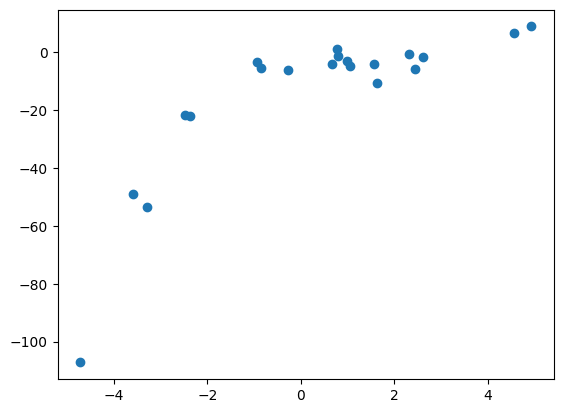

In [4]:
plt.scatter(x,y)

In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x,y)
y_pred  = model.predict(x)

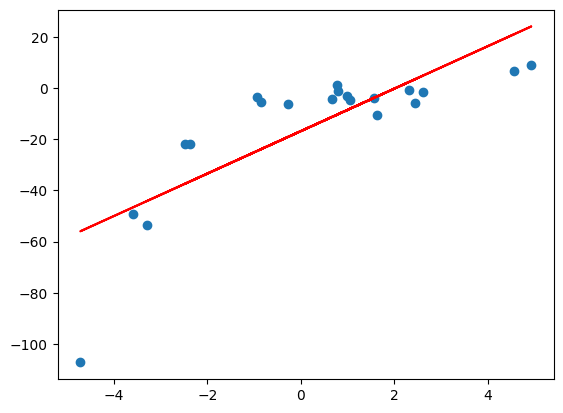

In [6]:
plt.scatter(x,y)
plt.plot(x,y_pred, color = 'r')
plt.show()

### Poly example

In [7]:
arr = np.array([1,2,3,4]).reshape(-1,1)
arr

array([[1],
       [2],
       [3],
       [4]])

In [8]:
# poly_features = PolynomialFeatures(degree= 3)
# new_arr = poly_features.fit_transform(arr)
# new_arr

In [9]:
# poly_features.get_feature_names_out()

### Lets apply polynomial regression

In [10]:
poly_features = PolynomialFeatures(degree= 3)
x_poly = poly_features.fit_transform(x)

pr_model = LinearRegression()
pr_model.fit(x_poly,y)
pr_y_pred = pr_model.predict(x_poly)

In [11]:
sort_index = x.flatten().argsort()
x_sorted = x.flatten()[sort_index]
pr_y_pred_sorted = pr_y_pred[sort_index]

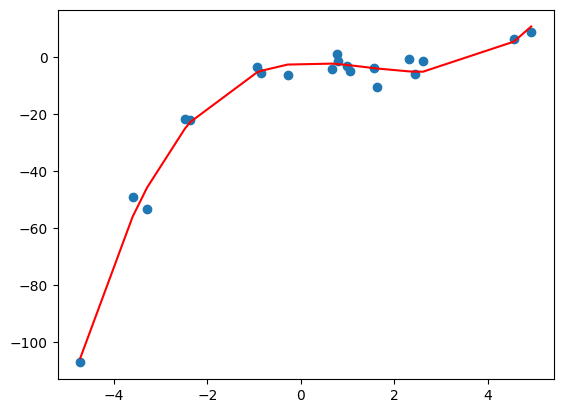

In [12]:
plt.scatter(x,y)
plt.plot(x_sorted,pr_y_pred_sorted, color = 'r')
plt.show()

# New data

In [13]:

n = 1000
x1 = np.random.randint(1,10,n)
x2 = np.linspace(0, .5, n)

noise = np.random.normal(0,0.5,n)
y = np.sin(x1) + np.cos(x2) + noise

df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y })
df

,x1,x2,y
0,4,0.000000,-0.418179
1,6,0.000501,0.884322
2,5,0.001001,0.078277
3,5,0.001502,0.061614
4,7,0.002002,2.286803
...,...,...,...
995,4,0.497998,-0.417511
996,9,0.498498,1.457133
997,3,0.498999,1.489349
998,5,0.499499,0.050217


In [14]:
# Lr model 1

model = LinearRegression()
model.fit(df[['x1','x2']], df['y'])

LinearRegression()

In [15]:
X = df[['x1','x2']]
df['y_pred'] = model.predict(X)

In [16]:
# !pip install plotly

In [17]:
import plotly.graph_objects as go

In [18]:
fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()


In [19]:
# LR model 3

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(df[['x1','x2']])

p_model = LinearRegression()
p_model.fit(x_poly, df['y'])


LinearRegression()

In [20]:
df['p_y_pred'] = p_model.predict(x_poly)

fig = go.Figure(data=[go.Scatter3d(x= df['x1'], y = df['x2'], z = df['y'], mode = "markers", name = "Actual", marker= dict(size =3))])
fig.add_trace(go.Scatter3d(x= df['x1'], y = df['x2'], z = df['p_y_pred'], mode = "markers", name = "Actual", marker= dict(size =3)))

fig.show()


### Metrices

In [21]:
# MAE 
from sklearn.metrics import mean_absolute_error
print('MAE of LR :-',mean_absolute_error(df["y"],df["y_pred"]))

# MSE
from sklearn.metrics import mean_squared_error
print('MSE of LR :', mean_squared_error(df["y"],df['y_pred']))

# RMSE
print("RMSE of LR :-",np.sqrt(mean_squared_error(df["y"],df["y_pred"])))

# R2 Squarred score
from sklearn.metrics import r2_score
print("R2_score of LR:-",r2_score(df["y"],df["y_pred"]))

MAE of LR :- 0.7255933452620693
MSE of LR : 0.7693143600431358
RMSE of LR :- 0.8771056721074924
R2_score of LR:- 0.00021846594540997355


### For Polynomial Regression

In [22]:
print('MAE of PR :-',mean_absolute_error(df["y"],df["p_y_pred"]))
print('MSE of PR :', mean_squared_error(df["y"],df['p_y_pred']))
print("RMSE of PR :-",np.sqrt(mean_squared_error(df["y"],df["p_y_pred"])))
print("R2_score of PR:-",r2_score(df["y"],df["p_y_pred"]))

MAE of PR :- 0.5715532364668434
MSE of PR : 0.4766140797721826
RMSE of PR :- 0.6903724210686452
R2_score of PR:- 0.3806043659448508


# New Model (Logistic Regression)

In [23]:
import pandas as pd
import numpy as np

# Creating a random dataset
 
study_hrs = np.random.normal(10,2,1000)
sleeping_hrs = np.random.normal(10,2,1000)

passed = (study_hrs + np.random.normal(0,1,1000)) > (sleeping_hrs + np.random.normal(0,1,1000))
passed = passed.astype(int)

In [24]:
df = pd.DataFrame({"study_hrs" : study_hrs,"sleeping_hrs" : sleeping_hrs,"passed" : passed})
df['passed'].value_counts()


passed
1    512
0    488
Name: count, dtype: int64

In [25]:
df

,study_hrs,sleeping_hrs,passed
0,6.463963,11.676405,0
1,5.240823,9.933926,0
2,8.276093,10.783672,0
3,6.742304,9.784102,0
4,9.829515,11.419935,0
...,...,...,...
995,7.552794,11.376351,0
996,12.457205,8.015181,1
997,8.387180,8.763391,0
998,12.207831,7.705393,1


### Model (Logistic Regression)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
x = df[["study_hrs","sleeping_hrs"]]
y = df["passed"]

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=20)

In [28]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = log_model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [31]:
print('confusion_matrix:-')
print(confusion_matrix(y_test,y_pred))
print('Accuracy:-',accuracy_score(y_test,y_pred))
print('Precision:-',precision_score(y_test,y_pred))
print('Reccall:-',recall_score(y_test,y_pred))

confusion_matrix:-
[[83 16]
 [13 88]]
Accuracy:- 0.855
Precision:- 0.8461538461538461
Reccall:- 0.8712871287128713


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        99
           1       0.85      0.87      0.86       101

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



# SVM (support vector machine)

In [33]:
from sklearn import datasets
import pandas as pd
# importing iris data

iris = datasets.load_iris()

In [34]:
type(iris)

sklearn.utils._bunch.Bunch

In [35]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["species"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [36]:
x = df.drop(['species'],axis = 1)
y = df["species"]

x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2 , random_state=20)

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [38]:
print('confusion_matrix:-')
print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

confusion_matrix:-
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

